In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix

from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import chi2_contingency

from sklearn import tree

file = '/Users/maymekms/Documents/Murdoch/ICT606 Machine Learning/Assignment 1/assignment1.csv'
#file = '/content/drive/MyDrive/! MACHINE LEARNING/Assignment 1/Dataset/assignment1.csv'
#file = '/content/sample_data/assignment1.csv'
# file = "dataset information.xlsx"

In [2]:
data = pd.read_csv(file)
# data = pd.read_excel(file, sheet_name = 'dataset')
data.head()

,participant number,Q214,Q225,Q227,Q228,Q231,Q233,Q454,Q578,Q589,...,Q137,Q139,Q174,Q164,Q457,Q196,Q187,Q197,Q195,Class
0,1,3,1,3,2,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,High_risk
1,2,1,1,1,1,1,1,2,1,0,...,1,1,0,0,0,0,0,0,1,High_risk
2,3,3,2,4,3,2,1,0,1,0,...,1,0,0,1,1,0,0,1,1,High_risk
3,4,1,1,2,1,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,High_risk
4,5,2,1,1,2,1,1,0,0,0,...,1,0,0,0,0,0,0,0,0,High_risk


# Data preparation

*   Checking if there are missing values in the dataset
*   Renaming the columns of the dataset (based on provided dataset description)


*   Dropping the participant number column
*   Mapping the output variable Risk, 'low_risk' as 0 and 'high_risk' as 1


*   Encoding to make sure convert to integer
*   Converting the output variable Risk to int







In [ ]:
data.isnull().sum()

participant number     0
Q214                   0
Q225                   0
Q227                   0
Q228                   0
Q231                   0
Q233                   0
Q454                   0
Q578                   0
Q589                   0
Q535                   0
Q536                   0
Q534                   0
Q588                   0
Q467                   0
Q137                   0
Q139                   0
Q174                   0
Q164                   0
Q457                   0
Q196                   0
Q187                   0
Q197                   0
Q195                   0
Class                  0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 25 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   participant number   179 non-null    int64 
 1   Q214                 179 non-null    int64 
 2   Q225                 179 non-null    int64 
 3   Q227                 179 non-null    int64 
 4   Q228                 179 non-null    int64 
 5   Q231                 179 non-null    int64 
 6   Q233                 179 non-null    int64 
 7   Q454                 179 non-null    int64 
 8   Q578                 179 non-null    int64 
 9   Q589                 179 non-null    int64 
 10  Q535                 179 non-null    int64 
 11  Q536                 179 non-null    int64 
 12  Q534                 179 non-null    int64 
 13  Q588                 179 non-null    int64 
 14  Q467                 179 non-null    int64 
 15  Q137                 179 non-null    int64 
 16  Q139    

In [ ]:
data.isna().sum() / len(data.index)*100

participant number     0.0
Q214                   0.0
Q225                   0.0
Q227                   0.0
Q228                   0.0
Q231                   0.0
Q233                   0.0
Q454                   0.0
Q578                   0.0
Q589                   0.0
Q535                   0.0
Q536                   0.0
Q534                   0.0
Q588                   0.0
Q467                   0.0
Q137                   0.0
Q139                   0.0
Q174                   0.0
Q164                   0.0
Q457                   0.0
Q196                   0.0
Q187                   0.0
Q197                   0.0
Q195                   0.0
Class                  0.0
dtype: float64

In [ ]:
# Dropping the first column ('participant number')
data = data.drop(data.columns[0], axis=1)

# Map 'low_risk' as 0 and 'high_risk' as 1
mapping = {'Low_risk': 0, 'High_risk': 1}
data['Class'] = data['Class'].map(mapping)
data


,Q214,Q225,Q227,Q228,Q231,Q233,Q454,Q578,Q589,Q535,...,Q137,Q139,Q174,Q164,Q457,Q196,Q187,Q197,Q195,Class
0,3,1,3,2,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,1,1,1,1,1,1,2,1,0,0,...,1,1,0,0,0,0,0,0,1,1
2,3,2,4,3,2,1,0,1,0,1,...,1,0,0,1,1,0,0,1,1,1
3,1,1,2,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,2,1,1,2,1,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,1,1,1,1,1,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
175,1,1,1,1,5,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176,1,3,3,2,3,3,0,0,0,0,...,1,0,0,0,0,0,0,0,0,1
177,3,4,3,4,2,1,2,0,0,0,...,1,0,1,1,0,1,1,1,1,1


In [ ]:
data.describe()

,Q214,Q225,Q227,Q228,Q231,Q233,Q454,Q578,Q589,Q535,...,Q137,Q139,Q174,Q164,Q457,Q196,Q187,Q197,Q195,Class
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,...,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,1.519553,1.726257,1.988827,1.675978,1.452514,1.307263,0.463687,0.150838,0.044693,0.145251,...,0.312849,0.150838,0.139665,0.156425,0.195531,0.134078,0.083799,0.145251,0.189944,0.525140
std,0.781390,1.058902,1.116721,0.871544,0.900519,0.814547,0.780787,0.358895,0.207208,0.353342,...,0.464954,0.358895,0.347611,0.364276,0.397721,0.341692,0.277863,0.353342,0.393357,0.500768
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,2.000000,2.000000,3.000000,2.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,4.000000,5.000000,5.000000,4.000000,5.000000,5.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
rename_items = {'Q214':'Q214_Being_Mum', 'Q225' : 'Q225_Feel_lonely', 'Q227' : 'Q227_Blame_myself', 'Q228' : 'Q228_Family_proud', 'Q231' : 'Q231_Not_Worth_living', 'Q233' : 'Q233_Taking_ownlife', 'Q454' : 'Q454_Close_to_Gamble',
'Q578' : 'Q578_Safe_plan', 'Q589' : 'Q589_SP_Patner', 'Q535' : 'Q535_SP_Clincian', 'Q536' : 'Q536_SP_keep_safe', 'Q534' : 'Q534_SP_Client', 'Q588' : 'Q588_SP_SafeToGoHome', 'Q467' : 'Q467_Patner_Moods', 'Q137' : 'Q137_MoneyWorries', 'Q139' : 'Q139_LastMonth',
'Q174' : 'Q174_Feeling_Alone', 'Q164' : 'Q164_Feeling_Unwell', 'Q457' : 'Q457_Crying_alot', 'Q196' : 'Q196_AngryPartner', 'Q187' : 'Q187_Cp_Partner', 'Q197': 'Q187_JealousPartner', 'Q195' : 'Q195_MoodyPartner', 'Class' : 'Risk'}

data.rename(rename_items, inplace = True , axis = 1)



In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Q214_Being_Mum         179 non-null    int64
 1   Q225_Feel_lonely       179 non-null    int64
 2   Q227_Blame_myself      179 non-null    int64
 3   Q228_Family_proud      179 non-null    int64
 4   Q231_Not_Worth_living  179 non-null    int64
 5   Q233_Taking_ownlife    179 non-null    int64
 6   Q454_Close_to_Gamble   179 non-null    int64
 7   Q578_Safe_plan         179 non-null    int64
 8   Q589_SP_Patner         179 non-null    int64
 9   Q535_SP_Clincian       179 non-null    int64
 10  Q536_SP_keep_safe      179 non-null    int64
 11  Q534_SP_Client         179 non-null    int64
 12  Q588_SP_SafeToGoHome   179 non-null    int64
 13  Q467_Patner_Moods      179 non-null    int64
 14  Q137_MoneyWorries      179 non-null    int64
 15  Q139_LastMonth         179 non-null    i

In [ ]:
print(data.columns)

Index(['Q214_Being_Mum', 'Q225_Feel_lonely', 'Q227_Blame_myself',
       'Q228_Family_proud', 'Q231_Not_Worth_living', 'Q233_Taking_ownlife',
       'Q454_Close_to_Gamble', 'Q578_Safe_plan', 'Q589_SP_Patner',
       'Q535_SP_Clincian', 'Q536_SP_keep_safe', 'Q534_SP_Client',
       'Q588_SP_SafeToGoHome', 'Q467_Patner_Moods', 'Q137_MoneyWorries',
       'Q139_LastMonth', 'Q174_Feeling_Alone', 'Q164_Feeling_Unwell',
       'Q457_Crying_alot', 'Q196_AngryPartner', 'Q187_Cp_Partner',
       'Q187_JealousPartner', 'Q195_MoodyPartner', 'Risk'],
      dtype='object')


In [ ]:
# Encoding to make sure convert to integer
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
# for column in data.columns:
#     y = class_le.fit_transform(data[column].values)
#     print(y)

y = class_le.fit_transform(data['Risk'].values)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Q214_Being_Mum         179 non-null    int64
 1   Q225_Feel_lonely       179 non-null    int64
 2   Q227_Blame_myself      179 non-null    int64
 3   Q228_Family_proud      179 non-null    int64
 4   Q231_Not_Worth_living  179 non-null    int64
 5   Q233_Taking_ownlife    179 non-null    int64
 6   Q454_Close_to_Gamble   179 non-null    int64
 7   Q578_Safe_plan         179 non-null    int64
 8   Q589_SP_Patner         179 non-null    int64
 9   Q535_SP_Clincian       179 non-null    int64
 10  Q536_SP_keep_safe      179 non-null    int64
 11  Q534_SP_Client         179 non-null    int64
 12  Q588_SP_SafeToGoHome   179 non-null    int64
 13  Q467_Patner_Moods      179 non-null    int64
 14  Q137_MoneyWorries      179 non-null    int64
 15  Q139_LastMonth         179 non-null    i

# Exploratory Data Analysis

Understanding the dataset and each of the variables using visualisations

*   Generate Histogram, Barplot and Correlation Heatmap

*   Perform Chi-square Test




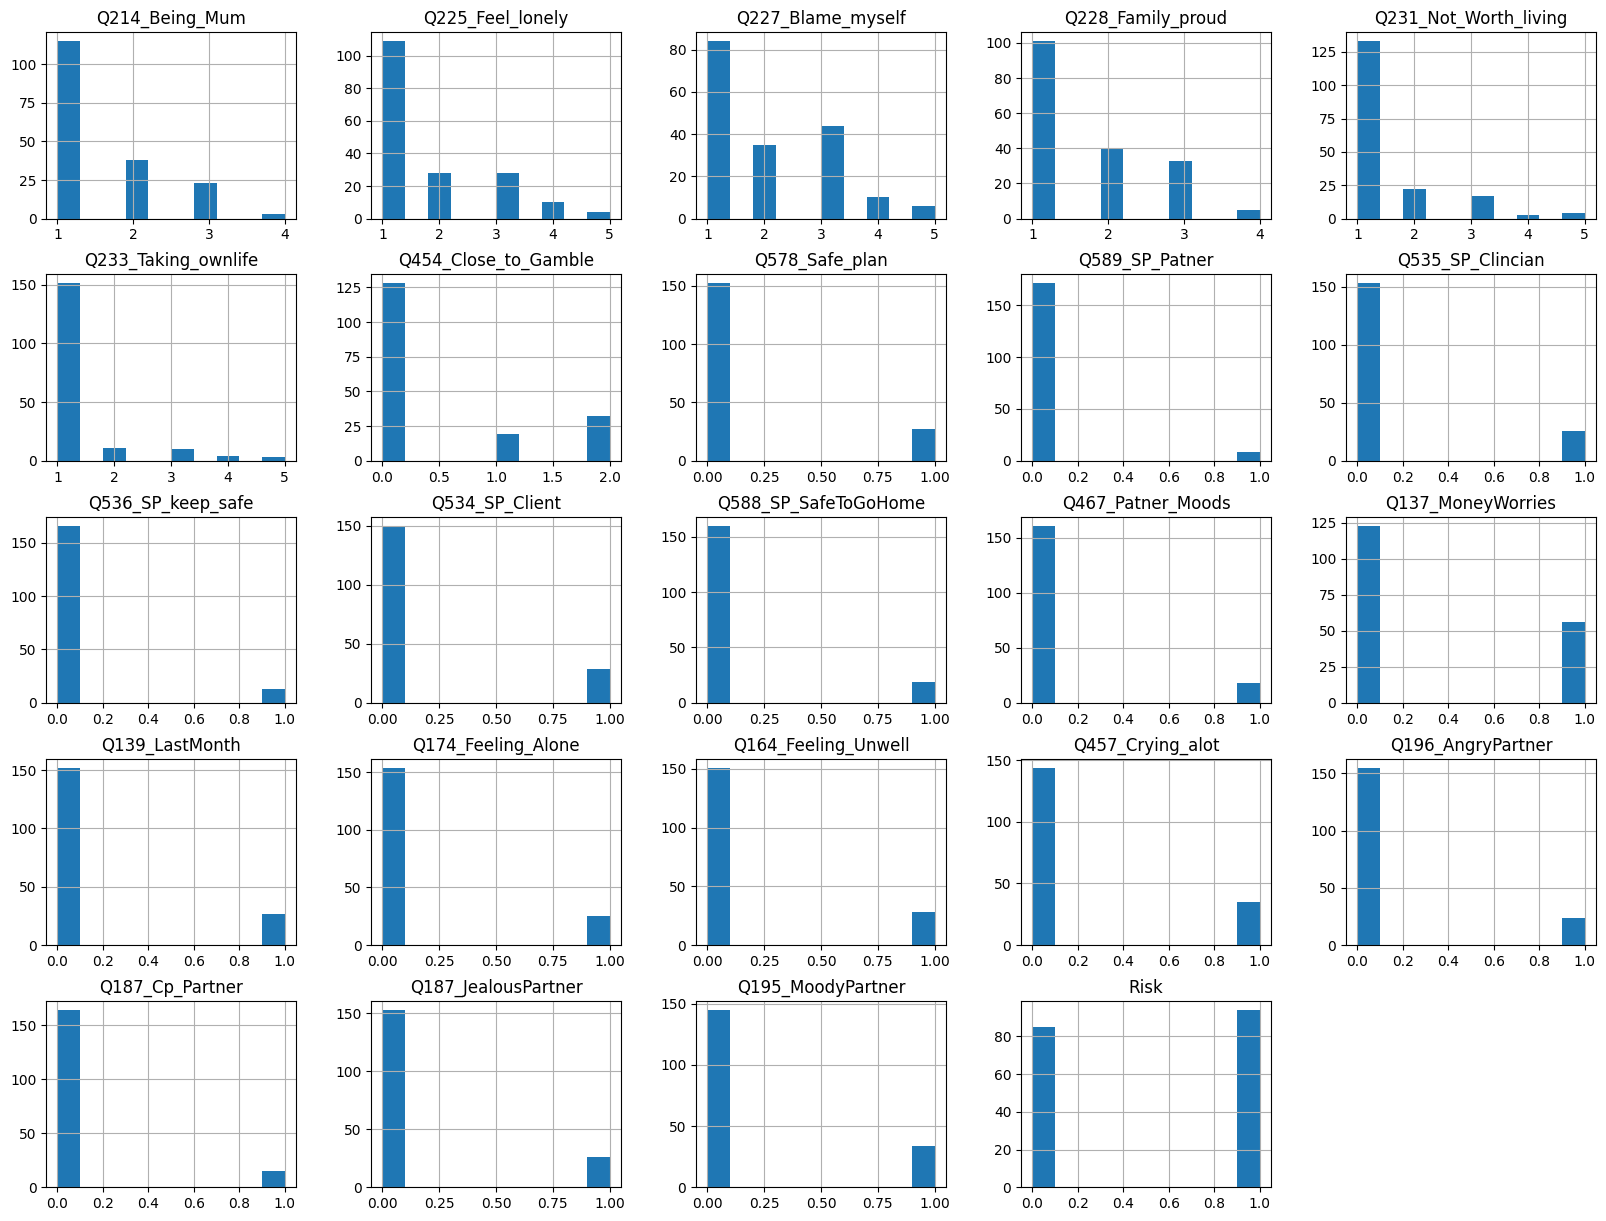

In [ ]:
data.hist(figsize=(20,15))
plt.show()

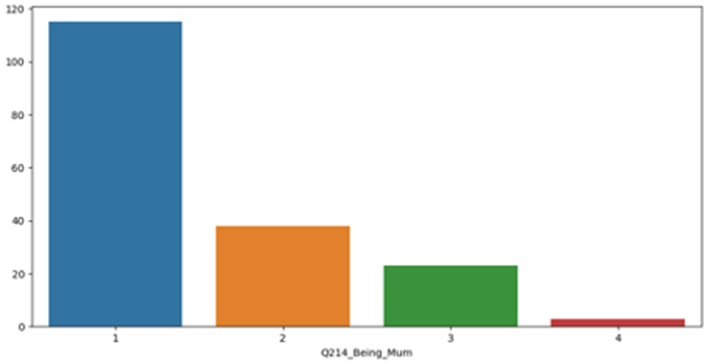

1=Almost always | 2=often | 3=Sometimes |4=a little |5= hardly ever

 The first question in the survey aimed to assess the participants' feelings about being a mum. Findings suggest that a significant proportion of participants also expressed a frequent sense of strength in their role as mothers.


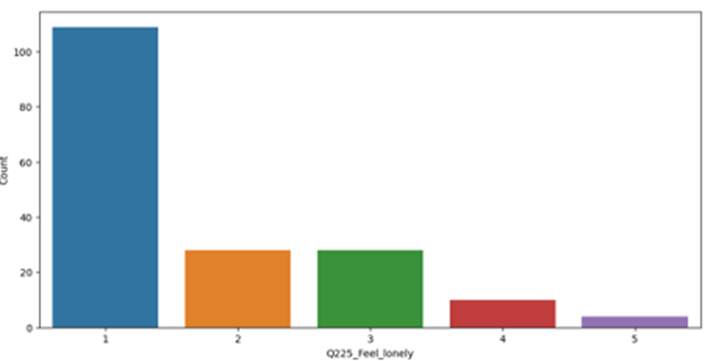

1=Hardly ever | 2=A little | 3=Sometimes |4=Often |5= Almost always.

 The second question “I feel lonely like I don't belong or fit in”. This suggests that the surveyed participants generally have a strong sense of connection and belonging within their social contexts.

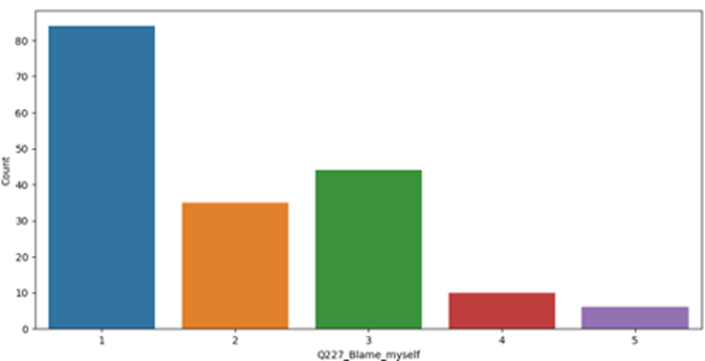

1=Hardly ever | 2=A little | 3=Sometimes |4=Often |5= Almost always|

The question 'I blame myself when things go wrong' assessed participants'. Analysis of the data revealed that most of participants selected the response 'Hardly ever,' indicating that a significant proportion of individuals reported infrequent self-blame.

 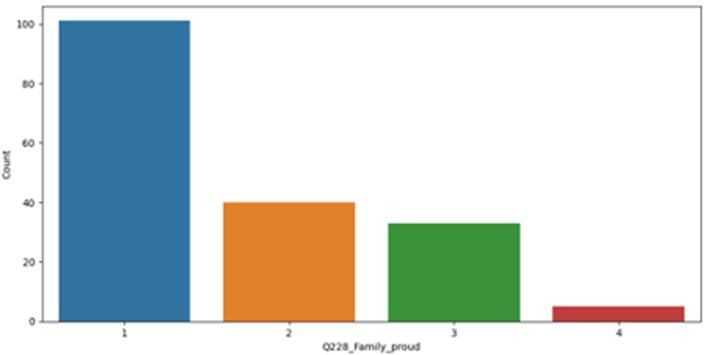

1=Almost always | 2=often | 3=Sometimes |4=a little |5= hardly ever

 The question 'I make my family proud'. Data analysis indicating that a significant proportion of individuals reported a strong belief in their ability to make their family proud.

 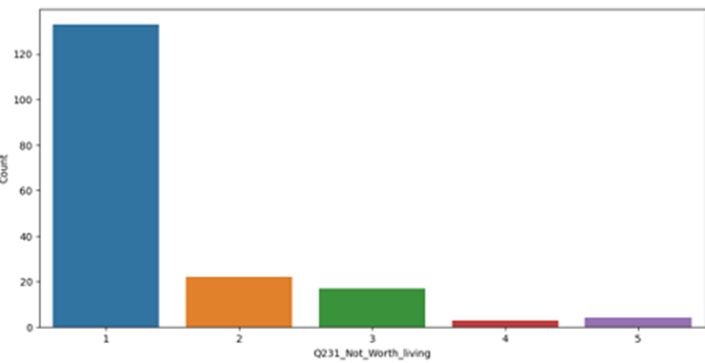

1=Hardly ever | 2=A little | 3=Sometimes |4=Often |5= Almost always

 The question 'I feel like life is not worth living'. This suggests that the surveyed participants generally have a positive outlook and perceive their lives as valuable and meaningful.

 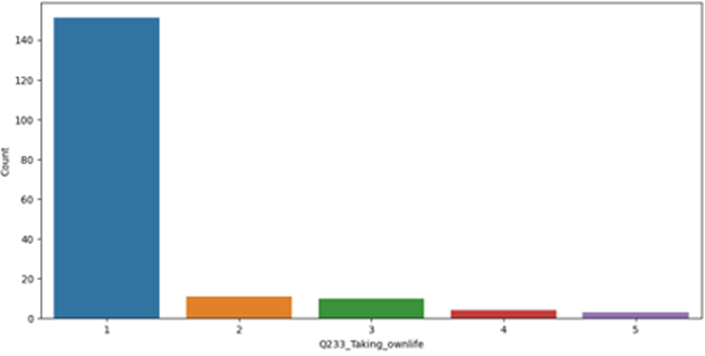

1=Hardly ever | 2=A little | 3=Sometimes |4=Often |5= Almost always

The question 'I feel like taking my own life' aimed to assess participants'. This suggests that the surveyed participants generally have a lower frequency of suicidal ideation.


 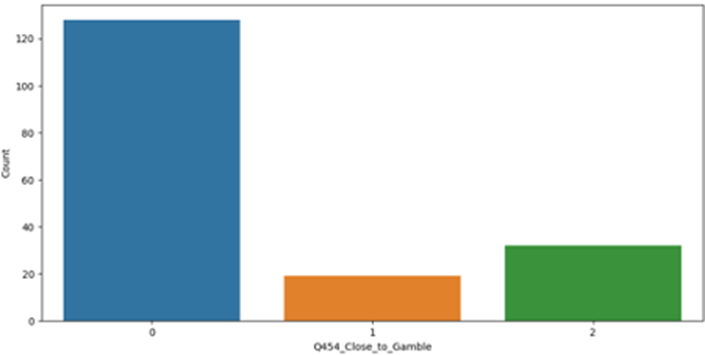

0=No | 1=Sometimes | 2=Yes

The question 'Do people close to you gamble?'. Indicating that a significant proportion of individuals reported that people close to them do not engage in gambling.

 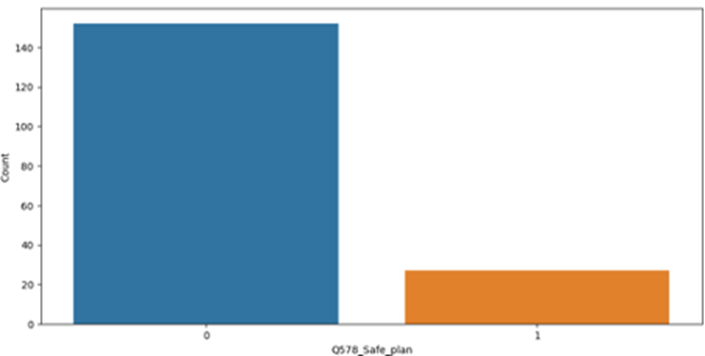

0=No | 1=Sometimes | 2=Yes

The question 'Safer plan triggered?'. This finding suggests that most participants did not require the implementation of a specific safety plan.

 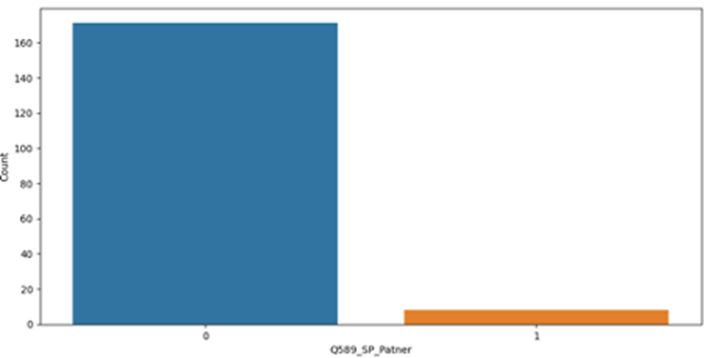

0: No | 1: Yes | 2: Mostly

The question 'SAFER PLAN: Do you feel safe when he gets like this? - current partner' aimed to assess participants' sense of safety when their current partner exhibits certain behaviours. This finding suggests that many participants do not perceive a sense of safety in these situations.

 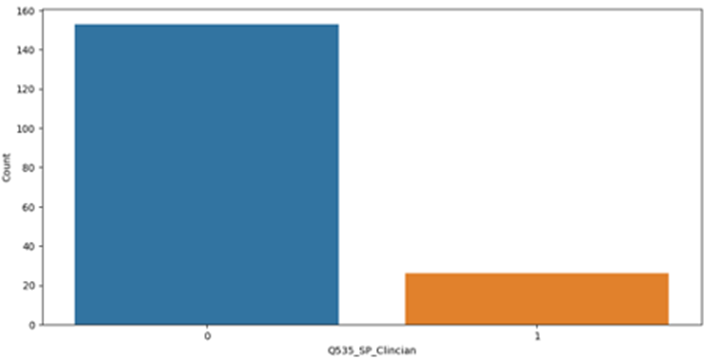


0:No | 1: Yes

The question 'SAFER PLAN: Clinician agrees to make a safer plan' aimed to determine whether the clinician agreed to formulate a safer plan for the participants. This finding suggests that, in most cases, the clinician did not find it necessary or appropriate to formulate a specific safety plan.

  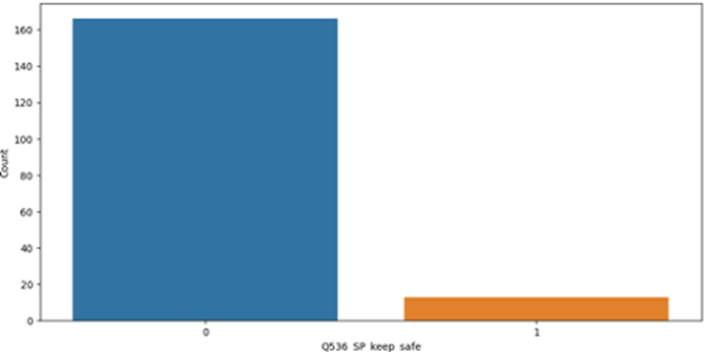

1=A lot | 2=A fair amount| 3=A little bit|4=Not at all

Provided data column from the data set feature information seems incorrect for this column.


 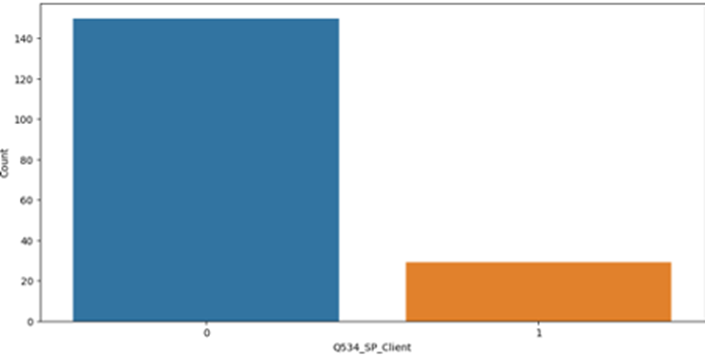

0:No | 1:Yes

The question 'SAFER PLAN: Client agrees to make safer plan' aimed to determine whether the client agreed to actively participate in formulating a safer plan. This finding suggests that there may be barriers or challenges preventing active engagement in the process of formulating a safer plan.

  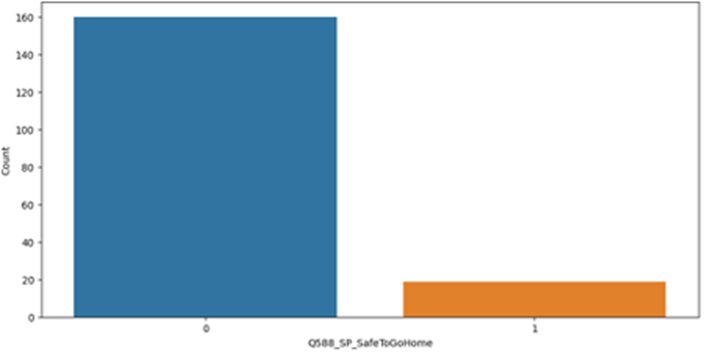

0: No | 1: Yes | 2: Mostly

 The question 'SAFER PLAN Current (male) partner: What about at the moment, do you feel safe to go home today?'. This finding suggests the presence of concerns or factors contributing to feelings of unsafety in the participants' relationships or circumstances.

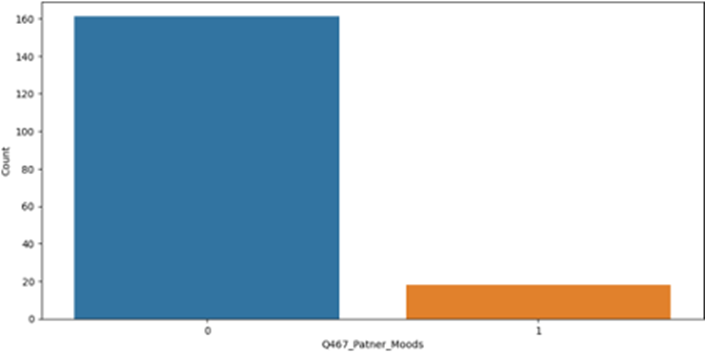


0:No | 1: Yes

The question 'The Man In Your Life: His Moods - His mood is worse with drink/drugs' aimed to explore the participants'. This finding suggests that based on the participants' observations, alcohol or drug use did not negatively impact the man's mood in their life.

 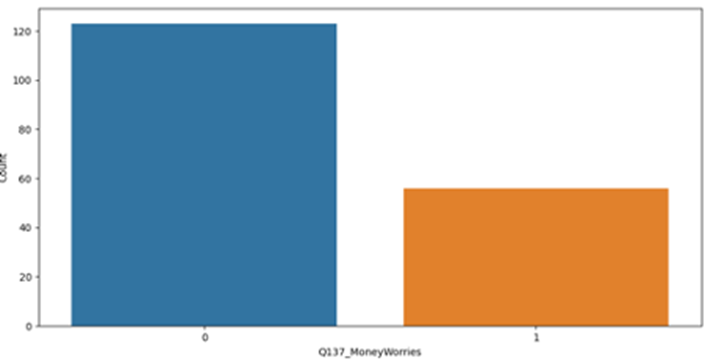

0:No | 1:Yes

The question 'Worries over the last month: Money worries' aimed to assess participants'. This finding suggests tha, most participants did not have significant concerns or worries about finances during the specified period.

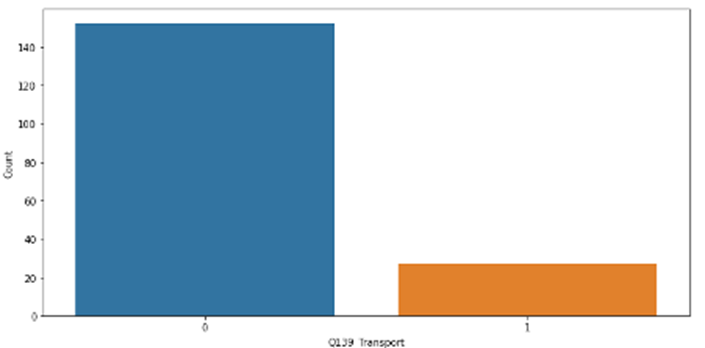

0:No | 1: Yes

The question 'Worries over the last month: Transport'. This finding suggests that most participants did not have significant concerns or worries regarding transportation during the specified time period.

 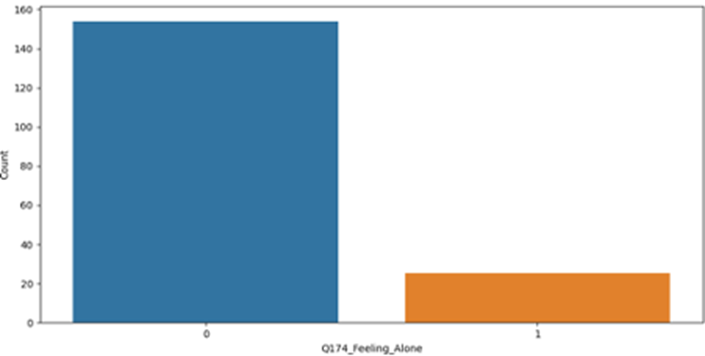

0:No | 1: Yes

The question 'How are you feeling in yourself? Feeling alone' aimed to assess participants' feelings of loneliness. This finding suggests that most participants did not experience feelings of loneliness.

  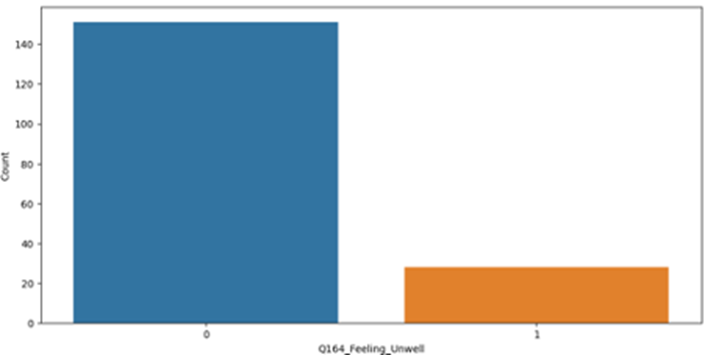

0: No | 1: Yes

The question 'How are you coping inside yourself? Heart beats fast, dizzy, tight chest or head, or panicky for no good reason'. This finding suggests that, based on the data collected, most participants did not experience rapid heartbeats, dizziness, tightness in the chest or head, or feelings of panic for no apparent reason

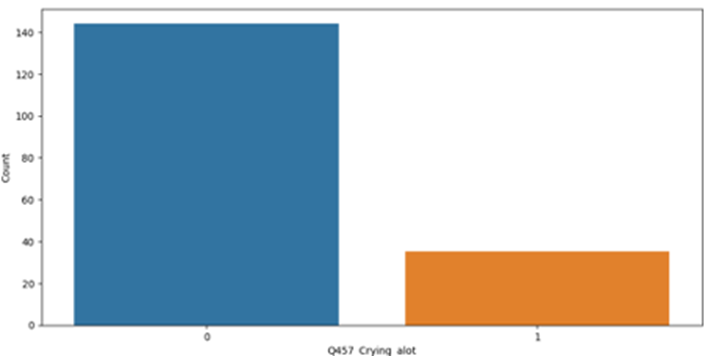

0: No | 1: Yes

The question 'How are you coping inside yourself? Crying a lot aimed to assess participants'. This finding suggests that most participants did not frequently cry to cope with their emotions.

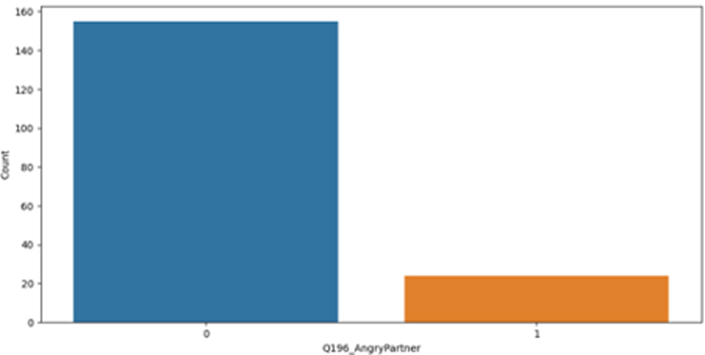

0: No | 1: Yes

The statement 'My partner is: Angry' aimed to assess participants' observations or experiences regarding their partner's anger. This finding suggests that majority of the participants did not perceive their partner to exhibit anger.

 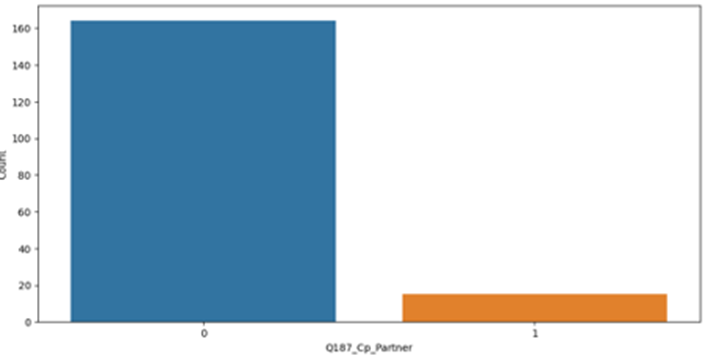

0: No | 1: Yes

The statement 'My partner is: Couch potato' aimed to assess participants'.This finding suggests that most participants did not report their partner's sedentary lifestyle.

 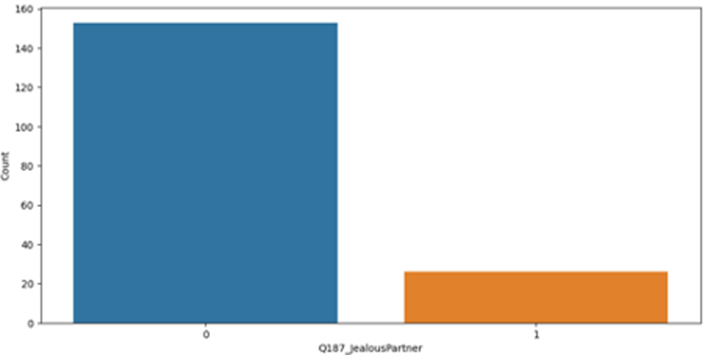

0: No | 1: Yes

The statement 'Partner is: Sometimes jealous' aimed to assess participants’. This finding suggests that most participants did not perceive their partner as exhibiting jealousy.

  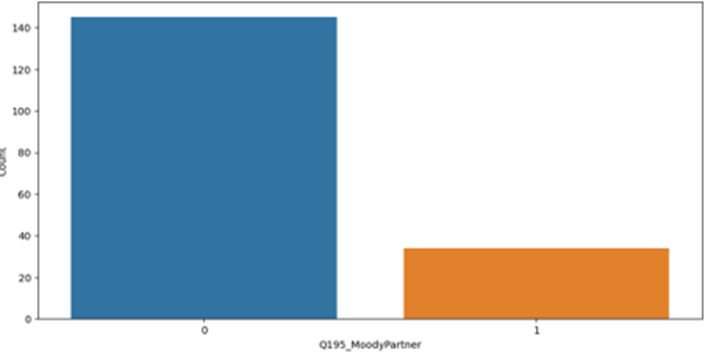

0: No | 1: Yes

The statement 'My partner is: Moody' aimed to assess participants' observations or perceptions of their partner's moodiness. Data analysis revealed that most participants did not report their partner exhibiting mood swings or moodiness.



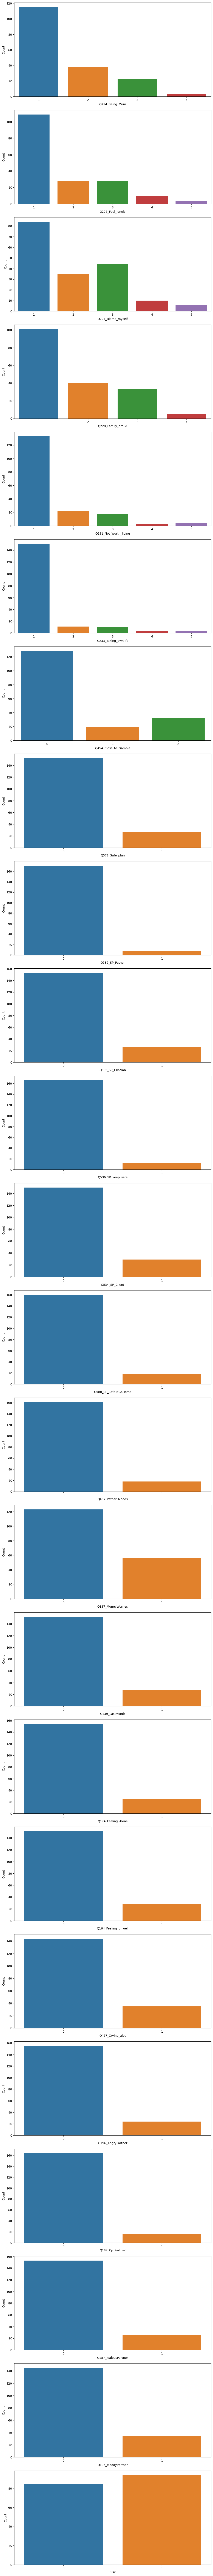

In [ ]:
# Select the columns for visualization
columns_to_visualize = data.columns[0:]

# Determine the number of rows and columns for subplots
num_rows = len(columns_to_visualize)
num_cols = 1

# Create subplots
fig, axs = plt.subplots(num_rows, num_cols, figsize = (10, 5 * num_rows))

# Iterate over each column and create a bar plot
for i, column in enumerate(columns_to_visualize):
    sns.countplot(x=column, data=data, ax=axs[i])
    axs[i].set_xlabel(column)
    axs[i].set_ylabel('Count')

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


<Axes: >

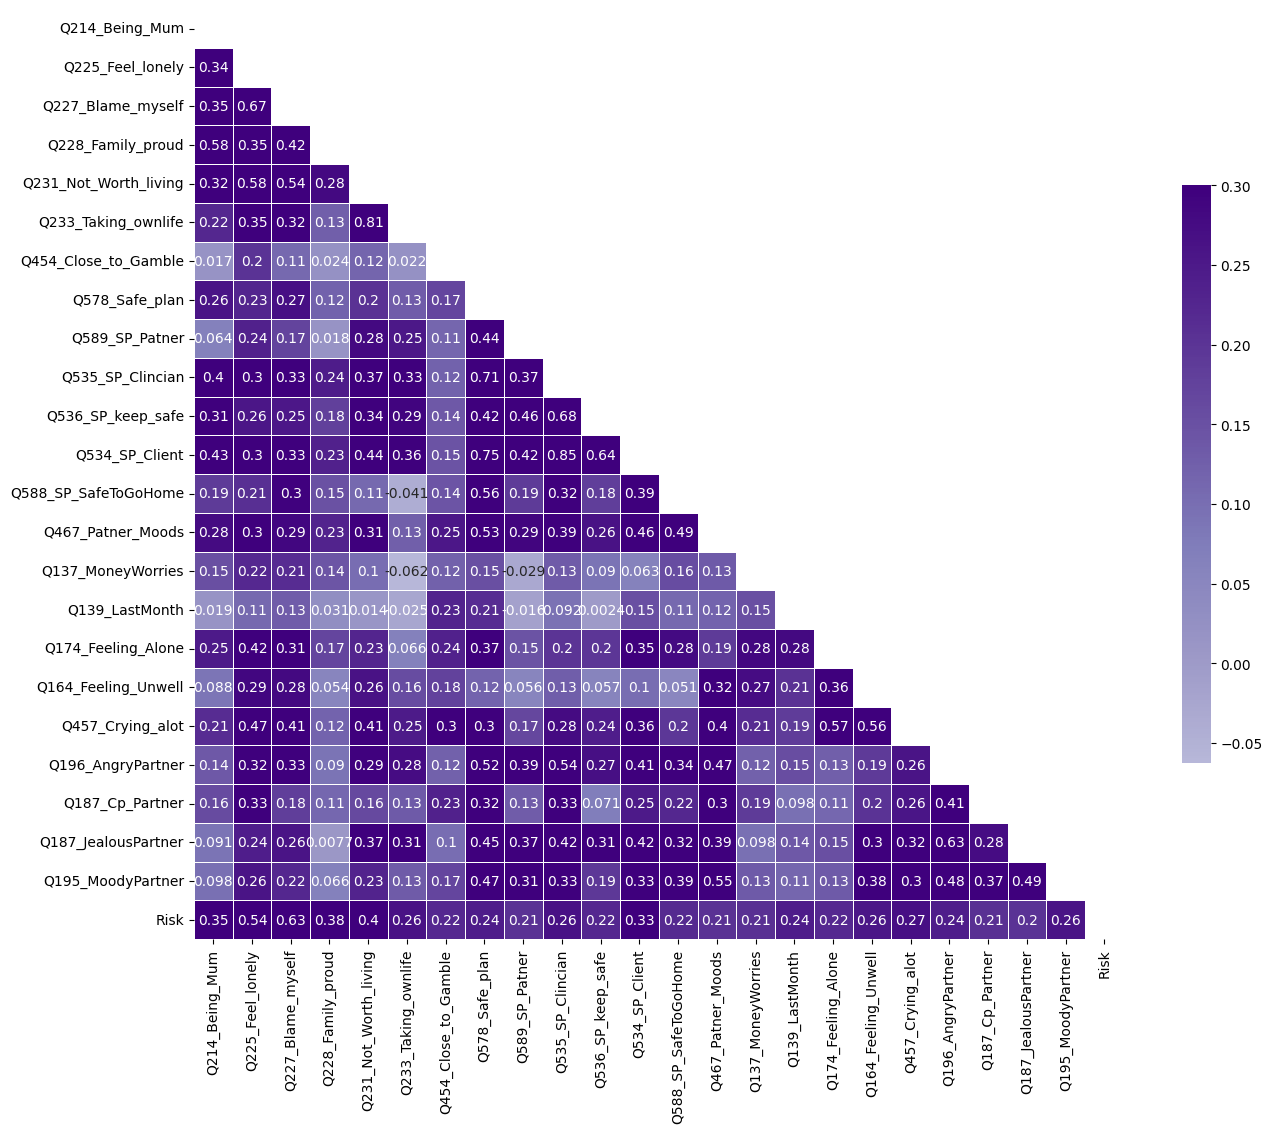

In [ ]:
# Compute the correlation matrix
corr = data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(15, 15))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='Purples', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)

In [ ]:
# Select the categorical columns to analyze
categorical_columns = data.columns[0:-1]  # Exclude the output variable Risk ## first variable was excluded

# Create an empty DataFrame to store the chi-square test results
results = pd.DataFrame(columns=['Column', 'Chi-square', 'p-value'])

# Iterate over each column
for column in categorical_columns:
    # Create a contingency table between the current column and the output variable
    contingency_table = pd.crosstab(data[column], data['Risk'])

    # Perform the chi-square test
    chi2, p_value, _, _ = chi2_contingency(contingency_table)

    # Store the results in the DataFrame
    results = results.append({'Column': column, 'Chi-square': chi2, 'p-value': p_value}, ignore_index=True)

# Print the results
print(results)

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be remove

                   Column  Chi-square       p-value
0          Q214_Being_Mum   21.633755  7.773811e-05
1        Q225_Feel_lonely   56.827451  1.344702e-11
2       Q227_Blame_myself   85.379777  1.260079e-17
3       Q228_Family_proud   26.371369  7.973634e-06
4   Q231_Not_Worth_living   42.608036  1.247859e-08
5     Q233_Taking_ownlife   18.811216  8.559804e-04
6    Q454_Close_to_Gamble   11.977436  2.506876e-03
7          Q578_Safe_plan    9.375036  2.199604e-03
8          Q589_SP_Patner    5.710314  1.686553e-02
9        Q535_SP_Clincian   11.109256  8.589796e-04
10      Q536_SP_keep_safe    7.264182  7.034331e-03
11         Q534_SP_Client   17.407815  3.015834e-05
12   Q588_SP_SafeToGoHome    7.200887  7.286754e-03
13      Q467_Patner_Moods    6.310506  1.200246e-02
14      Q137_MoneyWorries    6.824174  8.993212e-03
15         Q139_LastMonth    9.375036  2.199604e-03
16     Q174_Feeling_Alone    7.568958  5.938210e-03
17    Q164_Feeling_Unwell   10.318842  1.316789e-03
18       Q45

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


# Prediction Model Implementation


*   Split the data into training (80%) and testing data (20%)
*   Fit the ML models, Logistic Regression, Decision Tree and Random Forest.
*   Generate a Decision Tree Plot


In [ ]:
# Select the features (columns 1 to 23) and the target variable (column 'Risk')
X = data.iloc[:, 0:23]
y = data['Risk']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#key = ['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier']
key = ['LogisticRegression','DecisionTreeClassifier','RandomForestClassifier']
value = [LogisticRegression(class_weight='balanced', solver='liblinear'),
         DecisionTreeClassifier(random_state=10), RandomForestClassifier(n_estimators=60, random_state=0)]

models = dict(zip(key,value))
models

{'LogisticRegression': LogisticRegression(class_weight='balanced', solver='liblinear'),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=10),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=60, random_state=0)}

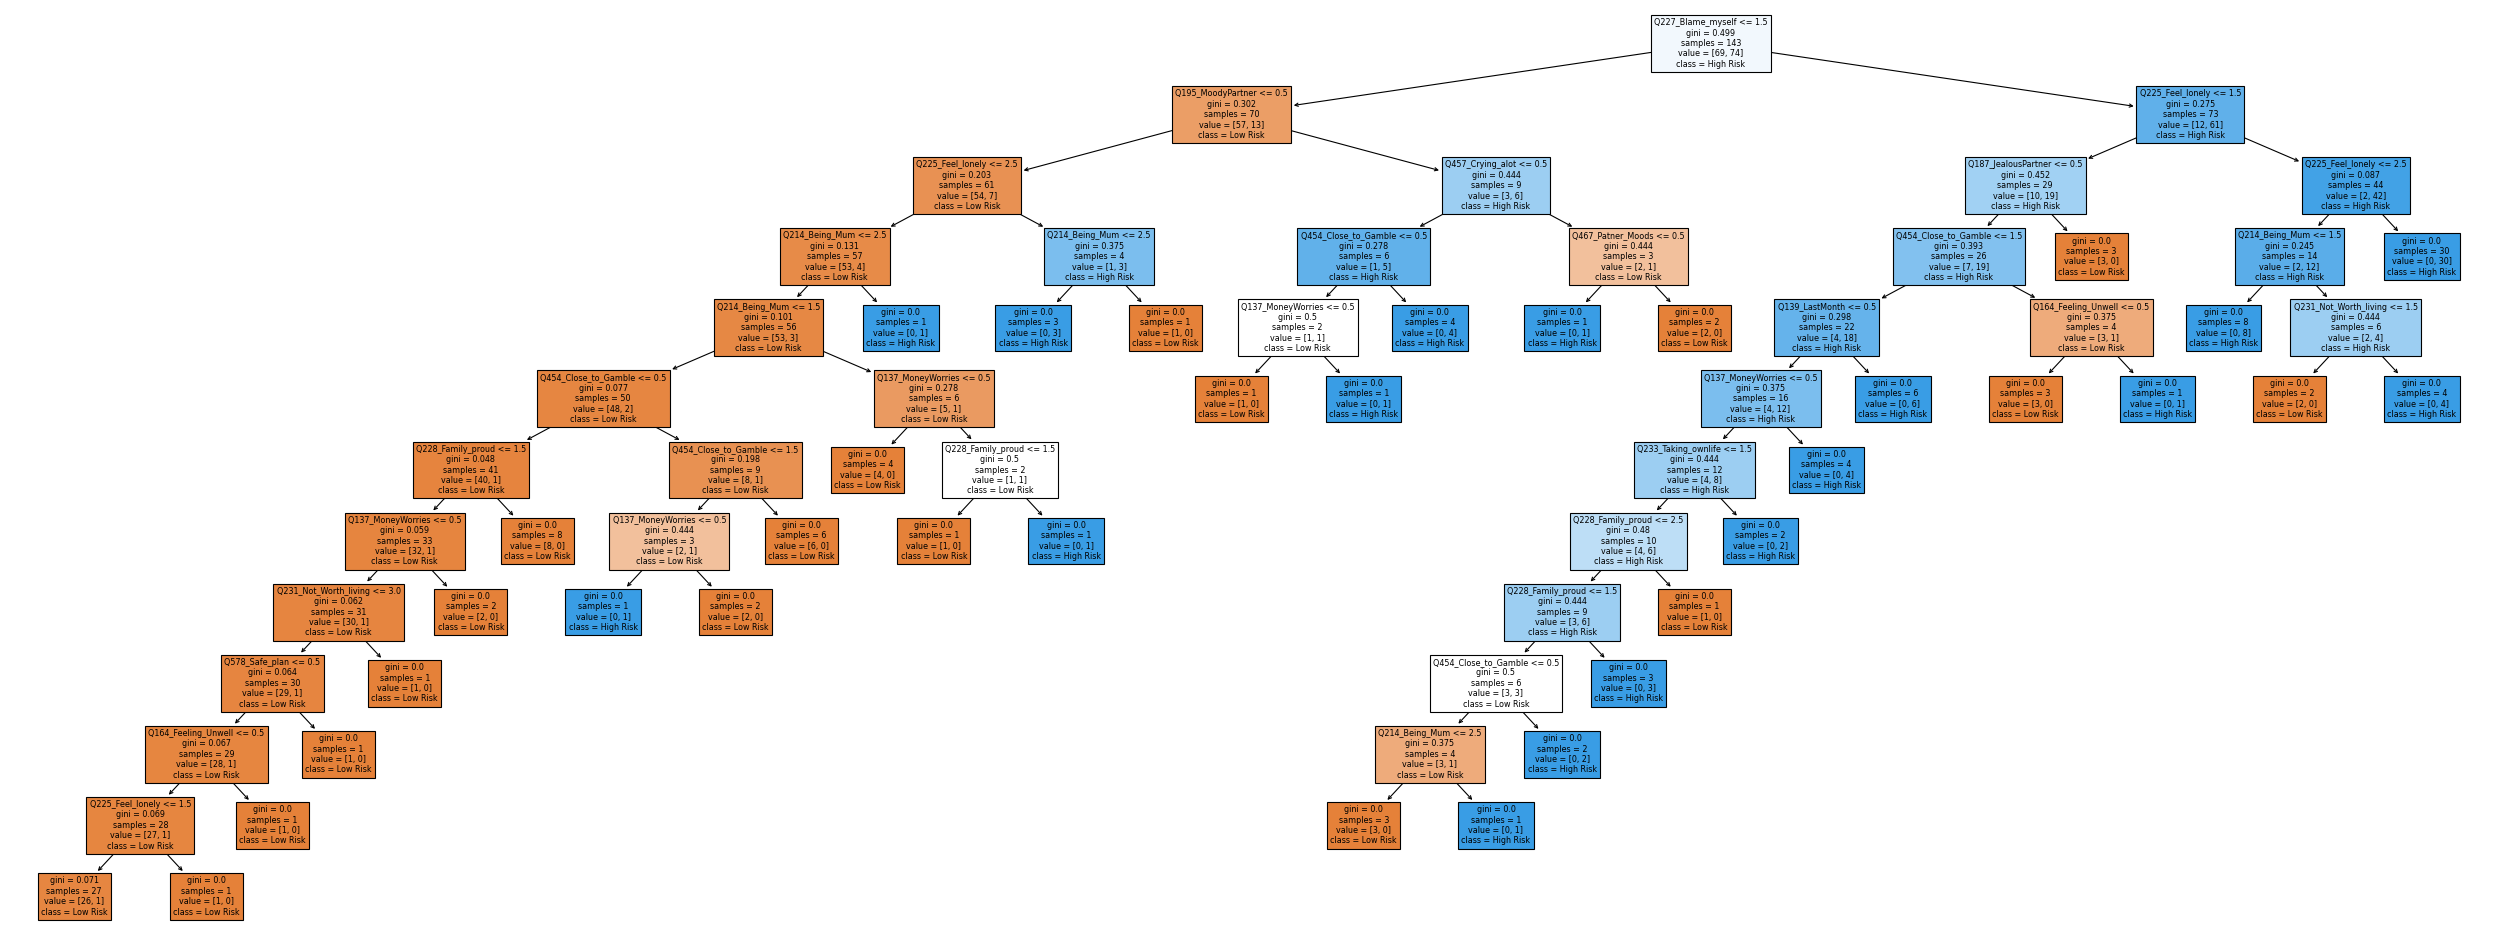

In [ ]:
# Decision Tree plot
decision_tree = DecisionTreeClassifier(random_state=10)

decision_tree.fit(X_train, y_train)

plt.figure(figsize=(40, 15), dpi=80)
tree.plot_tree(decision_tree, feature_names=X.columns, class_names=['Low Risk', 'High Risk'], filled=True)
plt.savefig('decision_tree.svg', format='svg')
plt.show()

# Prediction Model Evaluation


*   Generate Accuracy Score
*   Evaluate the model
*   Plotting the model accuracy
*   Generate Confusion Matrix
*   Generate ROC Curve


LogisticRegression : 0.8333333333333334
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        16
           1       0.85      0.85      0.85        20

    accuracy                           0.83        36
   macro avg       0.83      0.83      0.83        36
weighted avg       0.83      0.83      0.83        36

DecisionTreeClassifier : 0.8055555555555556
              precision    recall  f1-score   support

           0       0.74      0.88      0.80        16
           1       0.88      0.75      0.81        20

    accuracy                           0.81        36
   macro avg       0.81      0.81      0.81        36
weighted avg       0.82      0.81      0.81        36

RandomForestClassifier : 0.8333333333333334
              precision    recall  f1-score   support

           0       0.86      0.75      0.80        16
           1       0.82      0.90      0.86        20

    accuracy                           0.83        36


Text(0.5, 1.0, 'Plotting the Model Accuracies')

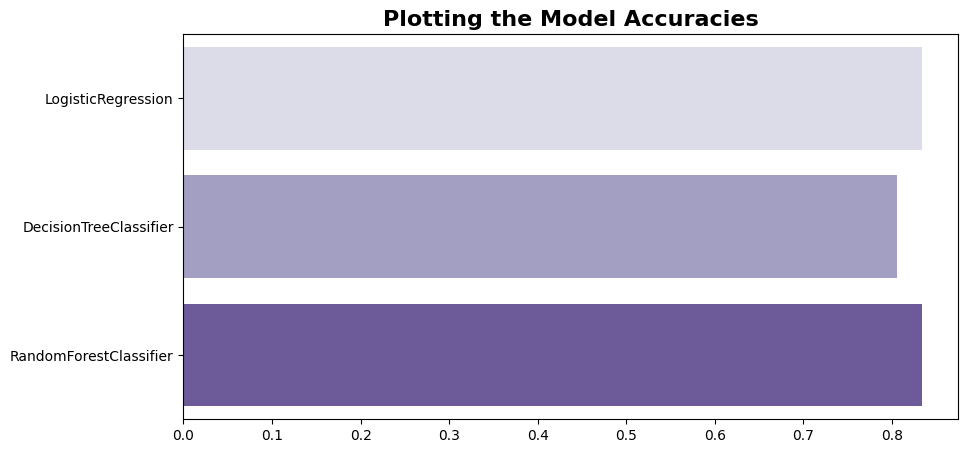

In [ ]:
#Model Evaluation
predicted =[]
scores = []

for name, algo in models.items():
    model = algo
    model.fit(X_train, y_train)
    predict = model.predict(X_test)

    acc = accuracy_score(y_test, predict)

    predicted.append(acc)
    print(name, ":", acc)

    report = classification_report(y_test, predict)
    print(report)

    score = cross_val_score(model, X, y, cv=5)
    scores.append({"mean": score.mean(), "standard_deviation": score.std()})

plt.figure(figsize = (10,5))
ax = sns.barplot(x = predicted, y = key, palette='Purples') #, order = predicted.sort()
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

In [ ]:
scores

[{'mean': 0.8214285714285714, 'standard_deviation': 0.056678003401133714},
 {'mean': 0.7934920634920635, 'standard_deviation': 0.050831830888667405},
 {'mean': 0.8438095238095238, 'standard_deviation': 0.03694493461219846}]

## Gradient Boosting Classifier

* True Positive (TP): 33.3%

Refers to the percentage of instances correctly predicted as class 1 (High Risk) out of all the actual class 1 instances. This indicates the percentage of correctly predicted positive instances (“High_risk”) out of all actual positive instances. It means that 33.3% of the “High_risk” cases were correctly identified by the model.

* False Negative (FN): 11.111%

Represents the percentage of instances incorrectly predicted as class 0 (Low Risk) when they actually belong to class 1. This represents the percentage of actual positive instances (High Risk) that were incorrectly classified as negative (Low Risk) by the model. It means that 11.111% of the High Risk cases were missed or misclassified by the model.

* False Positive (FP): 2.78%

Indicates the percentage of instances incorrectly predicted as class 1 when they are actually from class 0. This indicates the percentage of actual negative instances (Low Risk) that were incorrectly classified as positive (High Risk) by the model. It means that 2.78% of the Low Risk cases were falsely identified as High Risk.

* True Negative (TN): 52.78%

Refers to the percentage of instances correctly predicted as class 0 out of all the actual class 0 instances. This represents the percentage of correctly predicted negative instances (Low Risk) out of all actual negative instances. It means that 52.78% of the Low Risk cases were correctly identified by the model.


Text(50.722222222222214, 0.5, 'Actual')

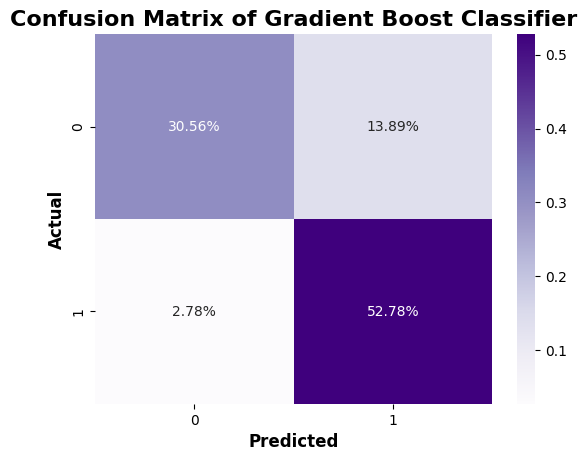

In [ ]:
# Generate Confusion Matrix
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
pred = gbc.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Purples')
plt.title('Confusion Matrix of Gradient Boost Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)

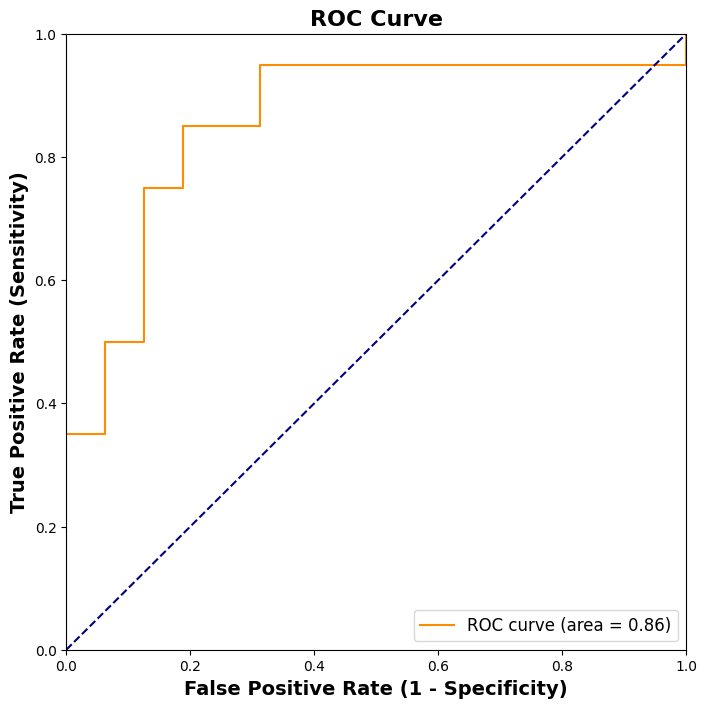

In [ ]:
# Encode the categorical labels
label_encoder = LabelEncoder()
y_test_encoded = label_encoder.fit_transform(y_test)
# Assuming 'High_risk' is encoded as 1 and 'Low_risk' is encoded as 0

# Fit the GradientBoostingClassifier
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)

# Get predicted probabilities for the positive class
pred_prob = gbc.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test_encoded, pred_prob)
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve', fontweight='bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight='bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight='bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()

## Further methods of intepretating models



*   Using SHapley Additive exPlanations (SHAP) on Random Forest Model
*   Using Local Interpretable Model Agnostic Explanation (LIME) on Logistic Regression



In [ ]:
import shap
explain_instance = data.loc[[100]]
explainer = shap.TreeExplainer(models["RandomForestClassifier"])
shap_values = explainer.shap_values(explain_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], explain_instance)

In [ ]:
# Import LimeTabularExplainer module
from lime.lime_tabular import LimeTabularExplainer

# Define the class names
class_names = ['Low_risk', 'High_risk']

# Get feature names
feature_names = list(X_train.columns)

# Fit Explainer on the training data set using the LimeTabularExplainer
explainer = LimeTabularExplainer(X_train.values, feature_names = feature_names,
                                 class_names = class_names, mode = 'classification')

In [ ]:
# Perform explainer on one row of data clinician is interested in
explaination = explainer.explain_instance(X_test.iloc[5], models["LogisticRegression"].predict_proba)

# Show graphical result
explaination.show_in_notebook(show_table = True, show_all = False)

X does not have valid feature names, but LogisticRegression was fitted with feature names
